<a href="https://colab.research.google.com/github/Pete-Nime/Areca-Tech-Ltd/blob/main/Heart_Diseases_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Case Study 1: Classification Model**

Patients medical records
Machine Learning - data
science - heart disceas/Yes or No.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier
print('Library Loaded')


Library Loaded


In [5]:
df = pd.read_csv('/content/heart.csv')
df.shape

(1000, 10)

In [6]:
df.head()

,age,sex,total_cholesterol,ldl,hdl,systolic_bp,diastolic_bp,smoking,diabetes,heart_attack
0,57,1,229.463642,175.879129,39.225687,124.070127,91.378780,0,0,0
1,58,1,186.464120,128.984916,34.950968,95.492552,64.355040,1,0,0
2,37,1,251.300719,152.347592,45.913288,99.519335,64.953147,0,1,0
3,55,1,192.058908,116.803684,67.208925,122.460002,73.821382,0,0,0
4,53,1,151.203448,107.017396,60.693838,123.022257,81.121946,0,1,0


In [7]:
df.isnull().sum()

,0
age,0
sex,0
total_cholesterol,0
ldl,0
hdl,0
systolic_bp,0
diastolic_bp,0
smoking,0
diabetes,0
heart_attack,0


In [8]:
cols = df.columns
cols

Index(['age', 'sex', 'total_cholesterol', 'ldl', 'hdl', 'systolic_bp',
       'diastolic_bp', 'smoking', 'diabetes', 'heart_attack'],
      dtype='object')

Talk with the stakeholders and team to figure out on how to substitute the zeros.

In [9]:
print(" # rows in dataset {0}".format(len(df)))
print(".........................................")

for col in cols:
  print("# rows in {1} with ZERO value: {0}".format(len(df.loc[df[col] == 0]), col))

 # rows in dataset 1000
.........................................
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 473
# rows in total_cholesterol with ZERO value: 0
# rows in ldl with ZERO value: 0
# rows in hdl with ZERO value: 0
# rows in systolic_bp with ZERO value: 0
# rows in diastolic_bp with ZERO value: 0
# rows in smoking with ZERO value: 798
# rows in diabetes with ZERO value: 910
# rows in heart_attack with ZERO value: 896


In [10]:
df.dtypes

,0
age,int64
sex,int64
total_cholesterol,float64
ldl,float64
hdl,float64
systolic_bp,float64
diastolic_bp,float64
smoking,int64
diabetes,int64
heart_attack,int64


**Visualisation**

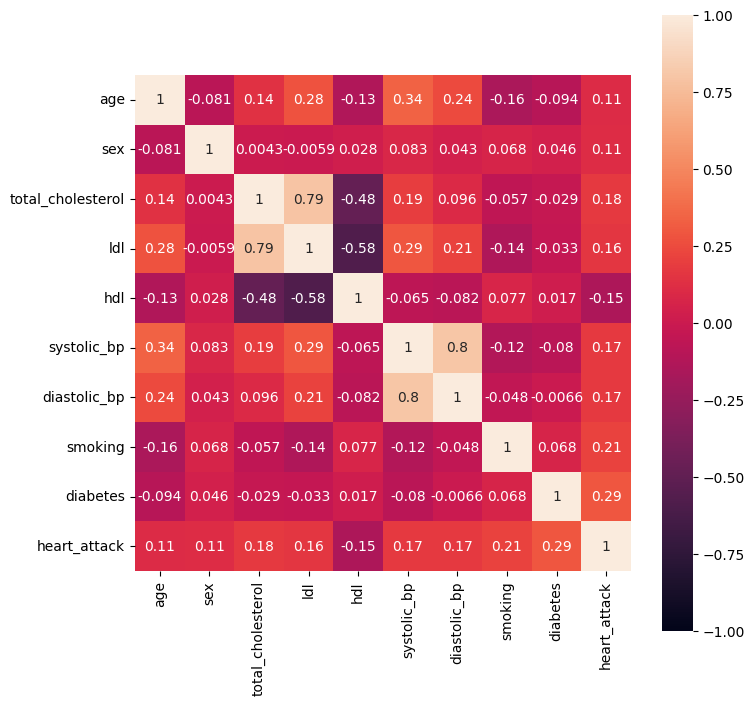

In [11]:
# Correlation Matrix
corrmat = df.corr()
fig = plt.figure(figsize = (8, 8))

sns.heatmap(corrmat, vmax = 1, square = True, annot = True, vmin =- 1)
plt.show()

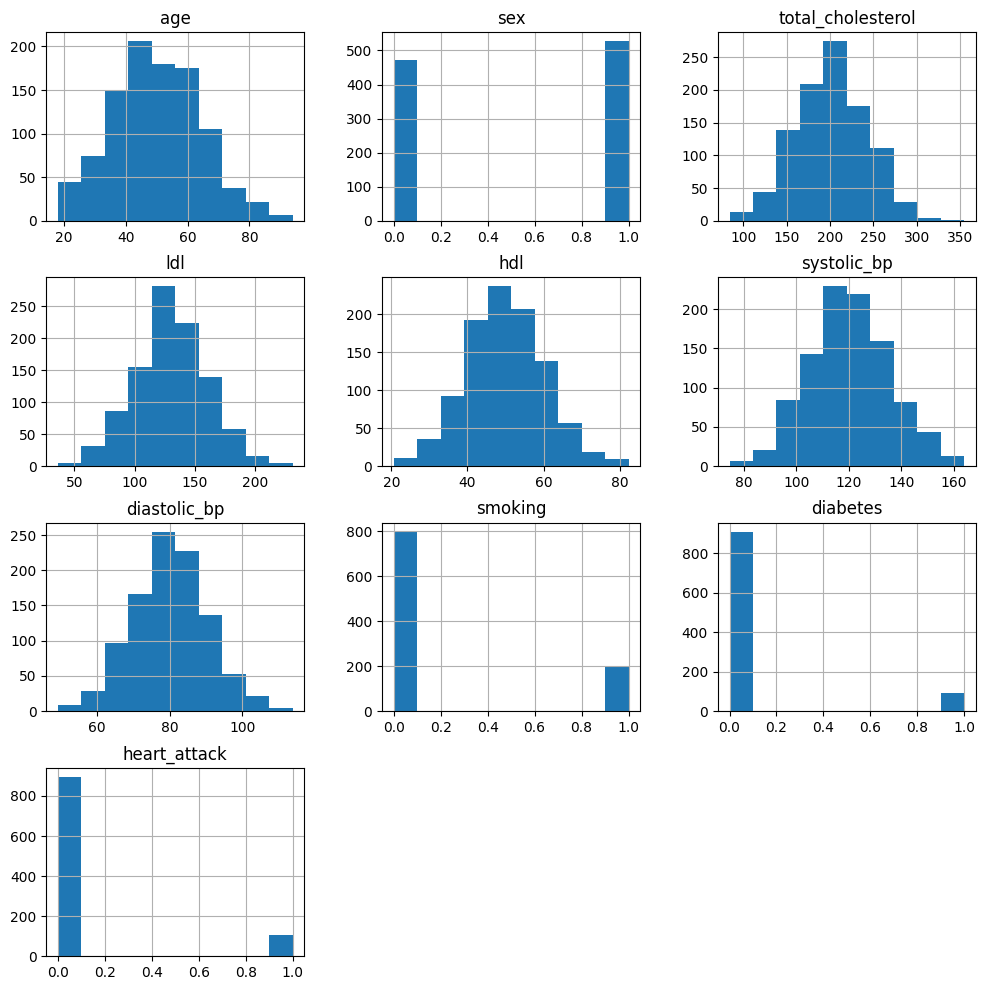

In [12]:
df.hist(figsize = (12, 12))
plt.show()

<Axes: xlabel='sex', ylabel='age'>

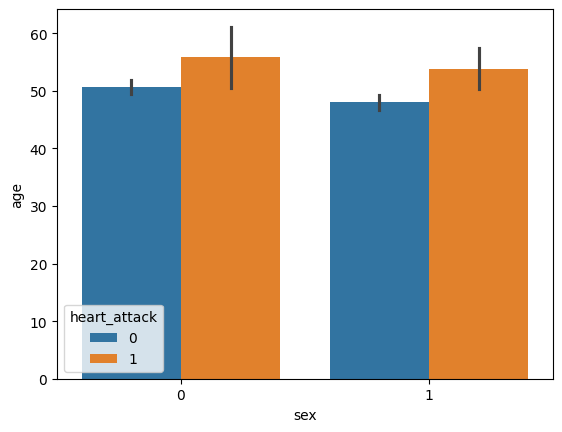

In [13]:
sns.barplot(x = "sex", y = "age", hue = "heart_attack", data = df)

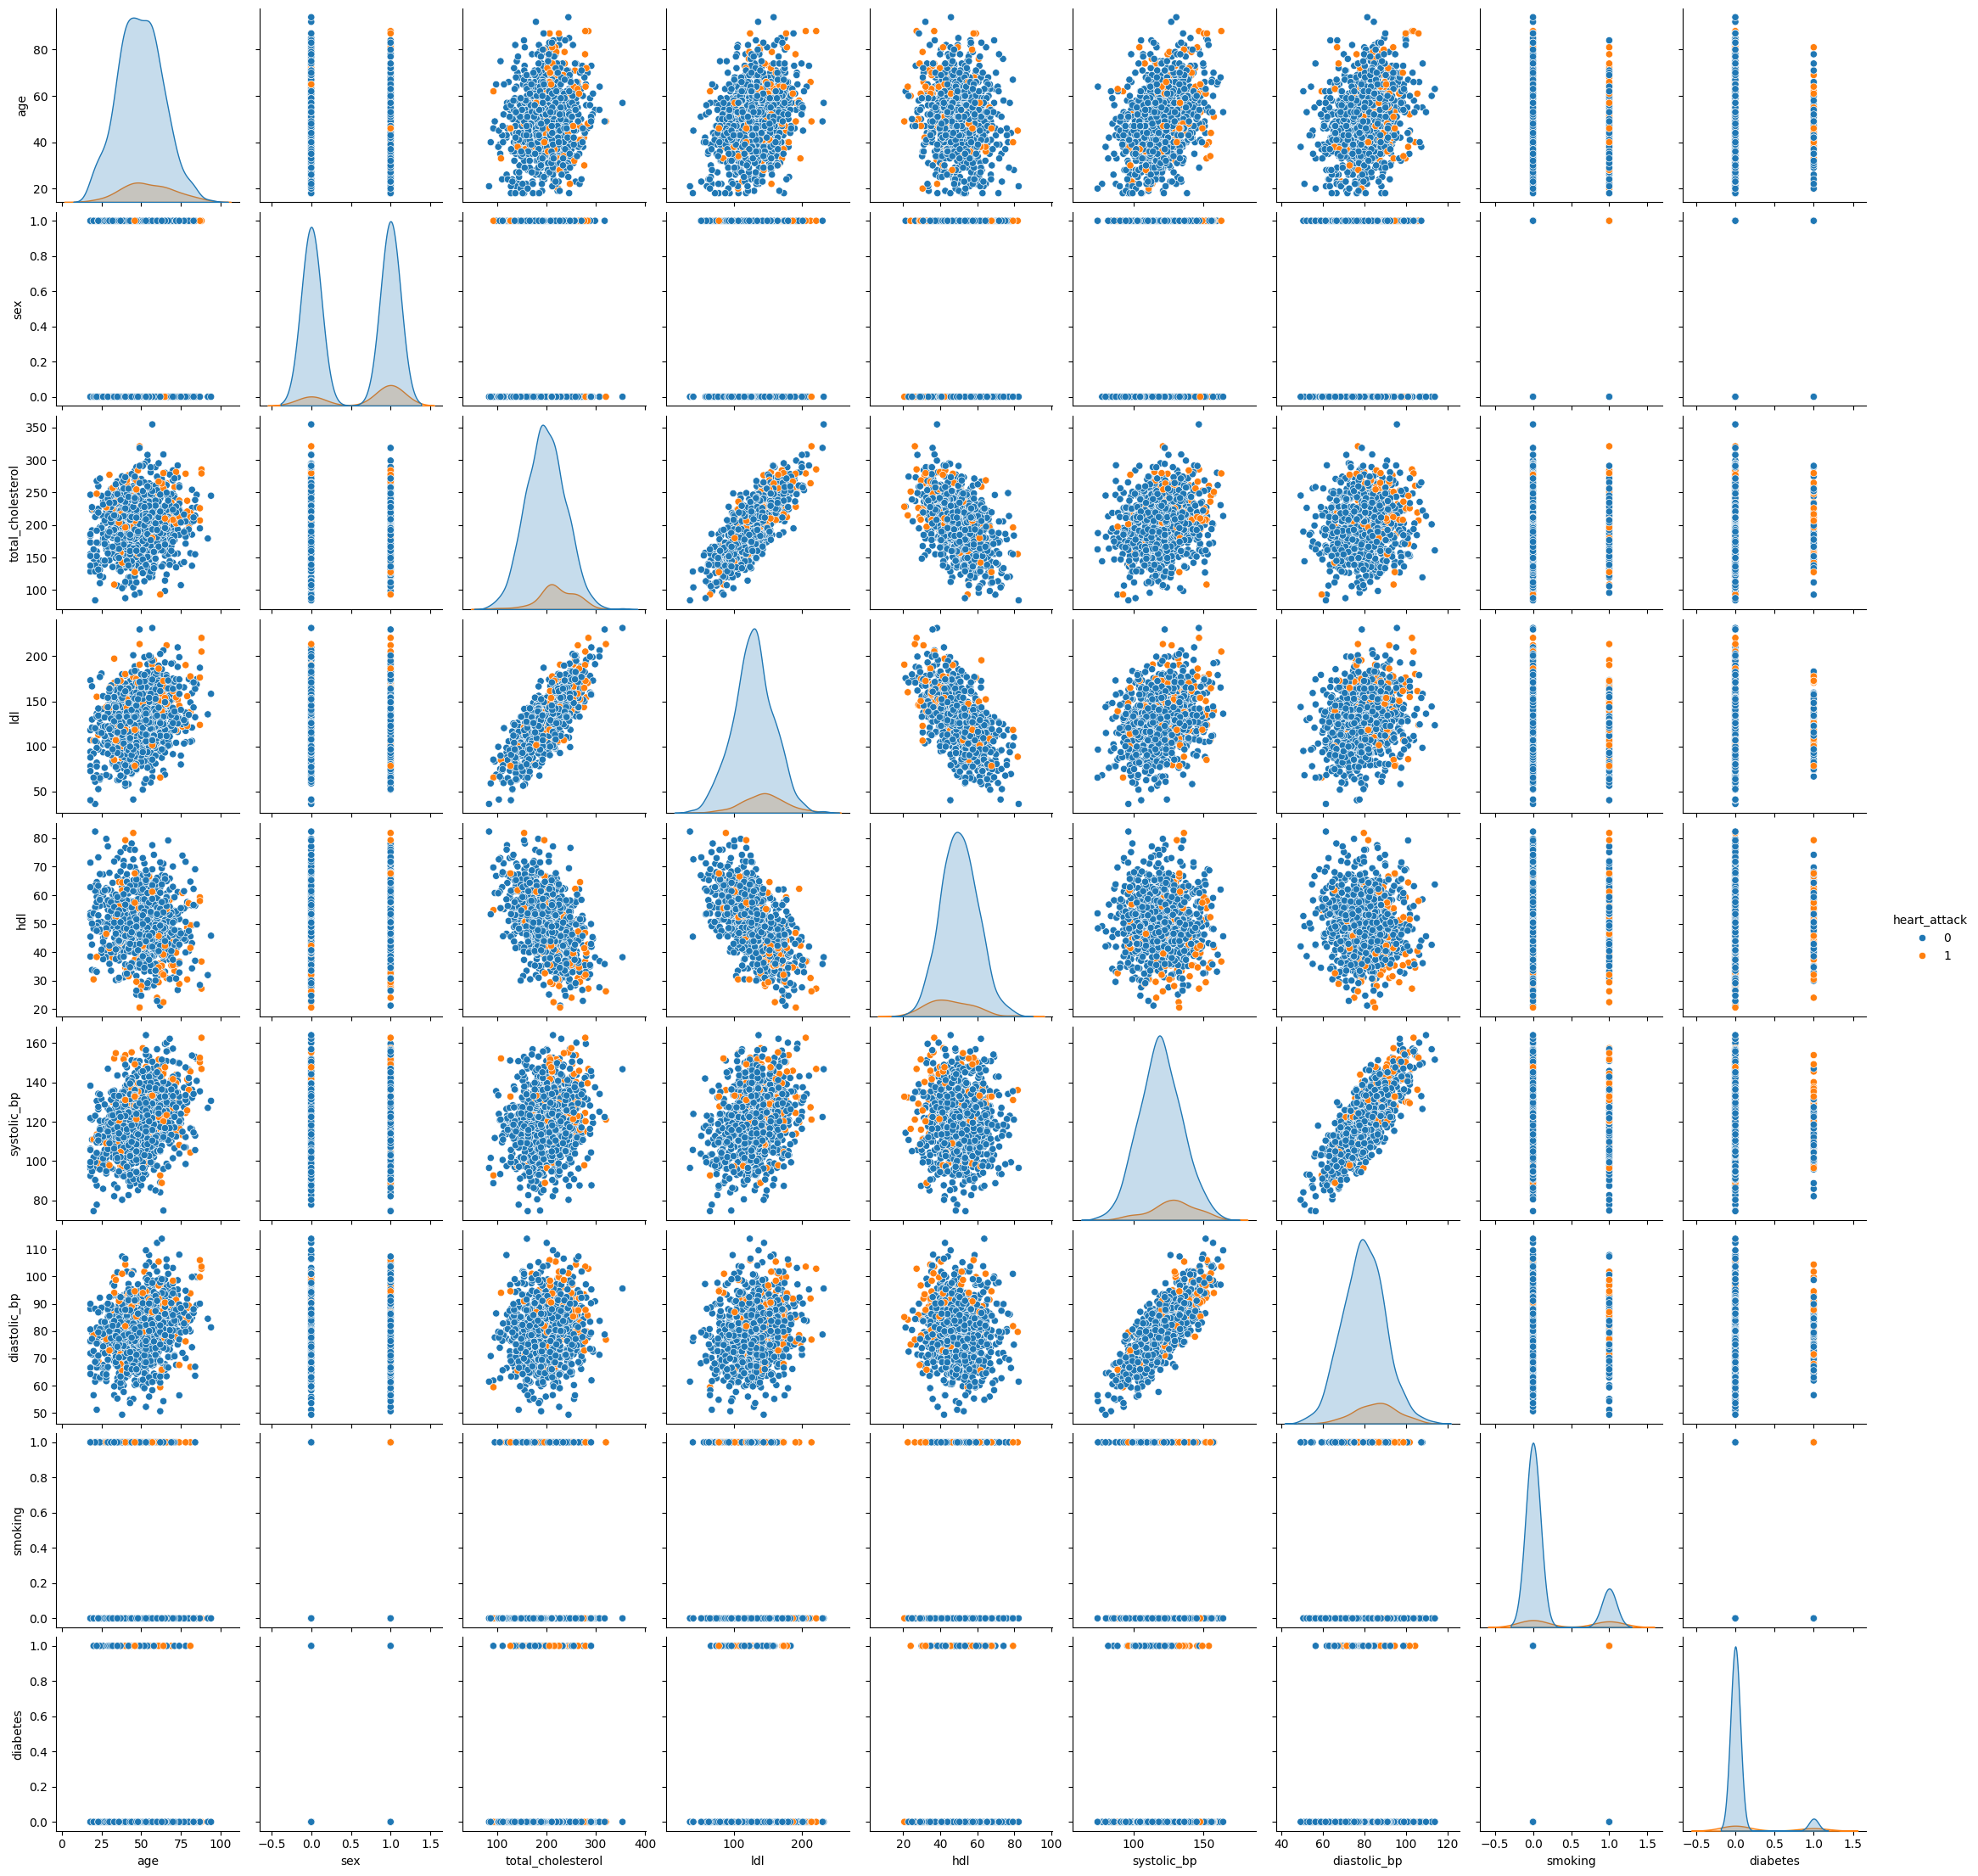

In [14]:
sns.pairplot(df, hue = "heart_attack")

In [15]:
from os import times_result
X = df.drop("heart_attack", axis = 1)
from sklearn.manifold import TSNE
import time
times_start = time.time()

df_tsne = TSNE(random_state = 10).fit_transform(X)

print ("t-SNE done! Time elasped: {} seconds".format(time.time() - times_start))

t-SNE done! Time elasped: 10.458635091781616 seconds


In [16]:
df_tsne

array([[ 31.528618 ,   6.3345027],
       [ -8.672031 , -16.594383 ],
       [ 43.116646 , -12.280129 ],
       ...,
       [-23.140148 ,  -7.2622905],
       [ -4.11614  , -11.94409  ],
       [-45.75267  ,  -3.8372824]], dtype=float32)

In [17]:
import matplotlib.patheffects as PathEffects
def fashion_scatter(x, colors):
  # choose a color palette eith seaborn.
  num_classes = len(np.unique(colors))
  palette = np.array(sns.color_palette("deep", num_classes))

  # create a scatter plot:
  f = plt.figure(figsize = (8, 8))
  ax = plt.subplot(aspect = "equal")
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c = palette[colors.astype(int)])
  plt.xlim(-25, 25)
  plt.ylim(-25, 25)
  ax.axis("off")
  ax.axis("tight")

  # add teh labels for each digit corresponding to the label
  txts = []

  for i in range(num_classes):

    # positions of each label at median of dta points:

      xtext, ytext = np.median(x[colors == i, :], axis = 0)
      txt = ax.text(xtext, ytext, str(i), fontsize = 24)
      txt.set_path_effects([
          PathEffects.Stroke(linewidth = 5, foreground = "w"),
          PathEffects.Normal()])
      txts.append(txt)

  return f, ax, sc, txts

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(-4.18583345413208, 0.4099348485469818, '0'),
  Text(19.760833740234375, 3.132413625717163, '1')])

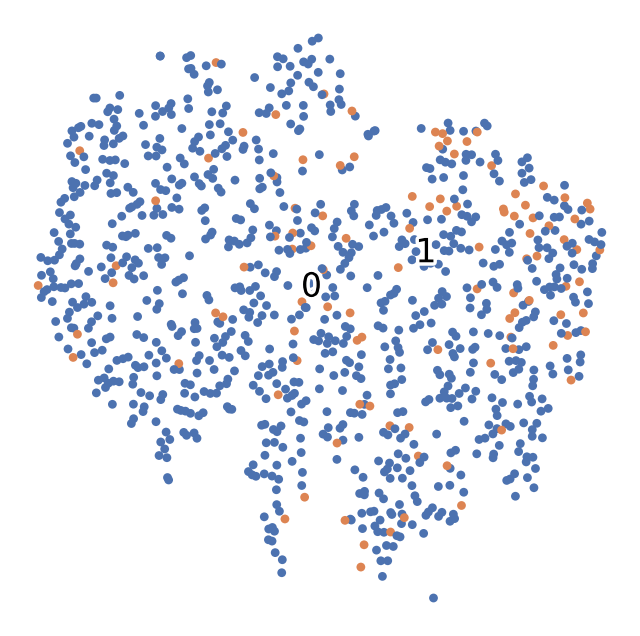

In [18]:
fashion_scatter(df_tsne, df.heart_attack)

**Feature Engineering**

In [19]:
df.heart_attack.value_counts()

,count
heart_attack,
0,896
1,104


In [20]:
print(" # rows in datasets {0}".format(len(df)))
print("........................................")

for col in cols:
  print("# rows in {1} with ZERO value: {0}".format(len(df.loc[df[col] == 0]), col))

 # rows in datasets 1000
........................................
# rows in age with ZERO value: 0
# rows in sex with ZERO value: 473
# rows in total_cholesterol with ZERO value: 0
# rows in ldl with ZERO value: 0
# rows in hdl with ZERO value: 0
# rows in systolic_bp with ZERO value: 0
# rows in diastolic_bp with ZERO value: 0
# rows in smoking with ZERO value: 798
# rows in diabetes with ZERO value: 910
# rows in heart_attack with ZERO value: 896


In [23]:
# Predictor feature columns
X = df.drop('heart_attack', axis = 1)
y = df.heart_attack

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training Set :" , len(X_train))
print("Test Set :", len(X_test))
print("Training labels :", len(y_train))
print("Test Labels :", len(y_test))

Training Set : 800
Test Set : 200
Training labels : 800
Test Labels : 200


In [ ]:
# imput with mean all 0 reading
from sklearn.preprocessing import Imputer

fill = Imputer(missing_values = 0, strategy = "mean", axis = 0)

X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)


**Model Building and Evaluation**

In [24]:
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score,
    average_precision_score, classification_report, confusion_matrix
)

def fit_and_eval(
    X_train, y_train, X_test, y_test,
    algo_name, estimator, param_grid,
    cv_splits=5, random_state=20
):
    """
    Grid-search, fit, and evaluate a classifier on an imbalanced binary target.
    Returns (best_estimator, metrics_dict, cv_results_).
    """

    np.random.seed(random_state)

    # Stratified CV is crucial for imbalanced classes
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=random_state)

    # If the model can output probabilities, prefer ROC AUC for refit; else F1
    supports_proba = hasattr(estimator, "predict_proba") or hasattr(estimator, "decision_function")
    scoring = {
        "accuracy": "accuracy",
        "balanced_accuracy": "balanced_accuracy",
        "f1": "f1",
    }
    if supports_proba:
        scoring.update({"roc_auc": "roc_auc", "average_precision": "average_precision"})
        refit_metric = "roc_auc"
    else:
        refit_metric = "f1"

    gs = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        cv=skf,
        scoring=scoring,           # multi-metric scoring
        refit=refit_metric,        # pick the metric to select the best model
        n_jobs=-1,
        verbose=1,
        error_score="raise"
    )

    gs.fit(X_train, y_train)
    best_model = gs.best_estimator_

    # Test-set predictions
    y_pred = best_model.predict(X_test)

    # Probabilities (if available) for ROC/PR metrics
    y_score = None
    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_test)[:, 1]
    elif hasattr(best_model, "decision_function"):
        y_score = best_model.decision_function(X_test)

    # Metrics
    metrics = {
        "algo": algo_name,
        "best_params": gs.best_params_,
        "refit_metric": refit_metric,
        "accuracy": accuracy_score(y_test, y_pred),
        "balanced_accuracy": balanced_accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred, labels=[0, 1]).tolist(),
        "classification_report": classification_report(y_test, y_pred, target_names=["NoAttack", "Attack"])
    }
    if y_score is not None:
        metrics["roc_auc"] = roc_auc_score(y_test, y_score)
        metrics["average_precision"] = average_precision_score(y_test, y_score)

    # Pretty printing
    print(f"\n[{algo_name}] Best Params: {metrics['best_params']}")
    print(f"Refit metric: {refit_metric} -> {gs.best_score_:.4f}")
    print(f"Test Accuracy:            {metrics['accuracy']:.4f}")
    print(f"Test Balanced Accuracy:   {metrics['balanced_accuracy']:.4f}")
    print(f"Test F1:                  {metrics['f1']:.4f}")
    if y_score is not None:
        print(f"Test ROC AUC:             {metrics['roc_auc']:.4f}")
        print(f"Test Average Precision:   {metrics['average_precision']:.4f}")
    print("Confusion Matrix [rows:true 0/1, cols:pred 0/1]:")
    print(np.array(metrics["confusion_matrix"]))
    print("\nClassification Report:\n", metrics["classification_report"])

    return best_model, metrics, gs.cv_results_


**Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

# Define the model
log_reg = LogisticRegression(
    max_iter=2000,        # allow enough iterations to converge
    class_weight="balanced",  # handle imbalance automatically
    solver="liblinear"    # good for small/medium datasets
)

# Hyperparameter grid to tune with GridSearch
param_grid = {
    "C": [0.01, 0.1, 1, 10]  # regularization strength
}

# Fit and evaluate
best_model, metrics, cv_results = fit_and_eval(
    X_train, y_train, X_test, y_test,
    algo_name="LogReg_balanced",
    estimator=log_reg,
    param_grid=param_grid,
    cv_splits=5
)


Fitting 5 folds for each of 4 candidates, totalling 20 fits

[LogReg_balanced] Best Params: {'C': 10}
Refit metric: roc_auc -> 0.8512
Test Accuracy:            0.8200
Test Balanced Accuracy:   0.7416
Test F1:                  0.3793
Test ROC AUC:             0.8544
Test Average Precision:   0.4251
Confusion Matrix [rows:true 0/1, cols:pred 0/1]:
[[153  30]
 [  6  11]]

Classification Report:
               precision    recall  f1-score   support

    NoAttack       0.96      0.84      0.89       183
      Attack       0.27      0.65      0.38        17

    accuracy                           0.82       200
   macro avg       0.62      0.74      0.64       200
weighted avg       0.90      0.82      0.85       200



**Random Forest**

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_params = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

rf_model, rf_metrics, _ = fit_and_eval(
    X_train, y_train, X_test, y_test,
    "RandomForest(balanced)",
    rf,
    rf_params
)

Fitting 5 folds for each of 36 candidates, totalling 180 fits

[RandomForest(balanced)] Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Refit metric: roc_auc -> 0.8385
Test Accuracy:            0.9050
Test Balanced Accuracy:   0.6013
Test F1:                  0.2963
Test ROC AUC:             0.7888
Test Average Precision:   0.2588
Confusion Matrix [rows:true 0/1, cols:pred 0/1]:
[[177   6]
 [ 13   4]]

Classification Report:
               precision    recall  f1-score   support

    NoAttack       0.93      0.97      0.95       183
      Attack       0.40      0.24      0.30        17

    accuracy                           0.91       200
   macro avg       0.67      0.60      0.62       200
weighted avg       0.89      0.91      0.89       200



**Gradient Boosting (XGBoost / LightGBM)**

In [29]:
# !pip install xgboost  # (run once if needed)

from xgboost import XGBClassifier

# Compute scale_pos_weight = negatives/positives for imbalance
pos = y_train.sum()
neg = (y_train == 0).sum()
spw = neg / max(pos, 1)

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    use_label_encoder=False,
    n_estimators=400,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=spw
)

xgb_params = {
    "max_depth": [3, 4, 6],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.5, 1.0]
}

xgb_model, xgb_metrics, _ = fit_and_eval(
    X_train, y_train, X_test, y_test,
    "XGBoost(scale_pos_weight)",
    xgb,
    xgb_params
)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [04:56:33] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



[XGBoost(scale_pos_weight)] Best Params: {'gamma': 1.0, 'max_depth': 6, 'min_child_weight': 5}
Refit metric: roc_auc -> 0.8132
Test Accuracy:            0.8700
Test Balanced Accuracy:   0.6622
Test F1:                  0.3500
Test ROC AUC:             0.7596
Test Average Precision:   0.3518
Confusion Matrix [rows:true 0/1, cols:pred 0/1]:
[[167  16]
 [ 10   7]]

Classification Report:
               precision    recall  f1-score   support

    NoAttack       0.94      0.91      0.93       183
      Attack       0.30      0.41      0.35        17

    accuracy                           0.87       200
   macro avg       0.62      0.66      0.64       200
weighted avg       0.89      0.87      0.88       200



**Fallback: GradientBoostingClassifier (no external install)**

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

gb_params = {
    "n_estimators": [200, 400],
    "learning_rate": [0.05, 0.1],
    "max_depth": [2, 3]
}

gb_model, gb_metrics, _ = fit_and_eval(
    X_train, y_train, X_test, y_test,
    "Sklearn-GradientBoosting",
    gb,
    gb_params
)

Fitting 5 folds for each of 8 candidates, totalling 40 fits

[Sklearn-GradientBoosting] Best Params: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}
Refit metric: roc_auc -> 0.8231
Test Accuracy:            0.9250
Test Balanced Accuracy:   0.6122
Test F1:                  0.3478
Test ROC AUC:             0.7777
Test Average Precision:   0.4035
Confusion Matrix [rows:true 0/1, cols:pred 0/1]:
[[181   2]
 [ 13   4]]

Classification Report:
               precision    recall  f1-score   support

    NoAttack       0.93      0.99      0.96       183
      Attack       0.67      0.24      0.35        17

    accuracy                           0.93       200
   macro avg       0.80      0.61      0.65       200
weighted avg       0.91      0.93      0.91       200



**Decision Tree**

In [33]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)

dt_params = {
    "max_depth": [None, 4, 6, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

dt_model, dt_metrics, _ = fit_and_eval(
    X_train, y_train, X_test, y_test,
    "DecisionTree(balanced)",
    dt,
    dt_params
)

Fitting 5 folds for each of 36 candidates, totalling 180 fits

[DecisionTree(balanced)] Best Params: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Refit metric: roc_auc -> 0.7010
Test Accuracy:            0.7750
Test Balanced Accuracy:   0.6369
Test F1:                  0.2623
Test ROC AUC:             0.6308
Test Average Precision:   0.1477
Confusion Matrix [rows:true 0/1, cols:pred 0/1]:
[[147  36]
 [  9   8]]

Classification Report:
               precision    recall  f1-score   support

    NoAttack       0.94      0.80      0.87       183
      Attack       0.18      0.47      0.26        17

    accuracy                           0.78       200
   macro avg       0.56      0.64      0.56       200
weighted avg       0.88      0.78      0.82       200



**Heart Attack Prediction – Model Performance Summary**

In [34]:
# ---------- Summary Table of Model Performance ----------

import pandas as pd
import numpy as np

def safe_get(d, k, default=np.nan):
    return d[k] if (d is not None and k in d) else default

# Collect whatever you actually ran; comment out any you didn’t run
all_metrics = []

# Each of these variables (e.g., logreg_metrics) is returned by fit_and_eval()
for name, m in [
    ("LogisticRegression", globals().get("logreg_metrics")),
    ("RandomForest", globals().get("rf_metrics")),
    ("XGBoost", globals().get("xgb_metrics")),
    ("Sklearn-GradientBoosting", globals().get("gb_metrics")),
    ("DecisionTree", globals().get("dt_metrics")),
]:
    if m is None:
        continue
    all_metrics.append({
        "Model": name,
        "Refit metric": safe_get(m, "refit_metric"),
        "CV best score": safe_get(m, "cv_best_score"),
        "Accuracy": safe_get(m, "accuracy"),
        "Balanced_Accuracy": safe_get(m, "balanced_accuracy"),
        "F1": safe_get(m, "f1"),
        "ROC_AUC": safe_get(m, "roc_auc"),
        "Avg_Precision": safe_get(m, "average_precision"),
        "Best_Params": safe_get(m, "best_params"),
    })

# Build DataFrame
summary_df = pd.DataFrame(all_metrics)

# Order columns nicely if present
cols_order = [
    "Model", "Refit metric", "CV best score",
    "Accuracy", "Balanced_Accuracy", "F1", "ROC_AUC", "Avg_Precision",
    "Best_Params"
]
summary_df = summary_df[[c for c in cols_order if c in summary_df.columns]]

# Sort by ROC_AUC first, then Average Precision (descending)
sort_cols = [c for c in ["ROC_AUC", "Avg_Precision"] if c in summary_df.columns]
if sort_cols:
    summary_df = summary_df.sort_values(by=sort_cols, ascending=False, kind="mergesort").reset_index(drop=True)

# Mark the top row as the winner
if not summary_df.empty:
    winner = summary_df.iloc[0]["Model"]
else:
    winner = "N/A"

print("\n=== Model Performance Summary (sorted by ROC_AUC, then Avg_Precision) ===")
display(summary_df)  # in notebooks; if running in plain Python, use print(summary_df)

print(f"\n🏆 Best overall (by ROC_AUC then Avg_Precision): {winner}")



=== Model Performance Summary (sorted by ROC_AUC, then Avg_Precision) ===


,Model,Refit metric,CV best score,Accuracy,Balanced_Accuracy,F1,ROC_AUC,Avg_Precision,Best_Params
0,RandomForest,roc_auc,NaN,0.905,0.601254,0.296296,0.788814,0.258822,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
1,Sklearn-GradientBoosting,roc_auc,NaN,0.925,0.612183,0.347826,0.777724,0.403508,"{'learning_rate': 0.05, 'max_depth': 2, 'n_est..."
2,XGBoost,roc_auc,NaN,0.870,0.662167,0.350000,0.759563,0.351766,"{'gamma': 1.0, 'max_depth': 6, 'min_child_weig..."
3,DecisionTree,roc_auc,NaN,0.775,0.636933,0.262295,0.630826,0.147669,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s..."



🏆 Best overall (by ROC_AUC then Avg_Precision): RandomForest


Among the models we tested, **Random Forest** came out as the most reliable. You can think of it as asking a whole group of specialists instead of just one — it looks at multiple factors together and votes on the outcome. This helps reduce errors and gives us a clearer picture of who is at higher risk of a heart attack. In practice, this means it could be used as a decision-support tool to help you identify at-risk patients faster and with more confidence."